# Recommender Systems Group Project

In [3]:
data_path ="data/ml-20m"


In [4]:
import pandas as pd
import seaborn as sns
from lenskit.algorithms import Recommender
from lenskit.algorithms.user_knn import UserUser


### Some data exploration

In [5]:
ratings_df = pd.read_csv(data_path+"/ratings.csv", nrows=20000) 
ratings_df.rename(columns={'userId': 'user',
                   'movieId': 'item'},
          inplace=True, errors='raise')
display(ratings_df.head(10))

,user,item,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580
5,1,112,3.5,1094785740
6,1,151,4.0,1094785734
7,1,223,4.0,1112485573
8,1,253,4.0,1112484940
9,1,260,4.0,1112484826


We get more insight into each of the datasets. We display how many users and movies we have

In [6]:
print(ratings_df.info())
print('number of users: ',len(ratings_df["user"].unique()))
print('number of movies: ', len(ratings_df["item"].unique()))
print()
print('study of ratings')
print(ratings_df.describe()['rating'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user       20000 non-null  int64  
 1   item       20000 non-null  int64  
 2   rating     20000 non-null  float64
 3   timestamp  20000 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 625.1 KB
None
number of users:  156
number of movies:  4192

study of ratings
count    20000.000000
mean         3.455500
std          1.121308
min          0.500000
25%          3.000000
50%          3.500000
75%          4.000000
max          5.000000
Name: rating, dtype: float64


Let´s see how often each rating occurs:

<AxesSubplot:>

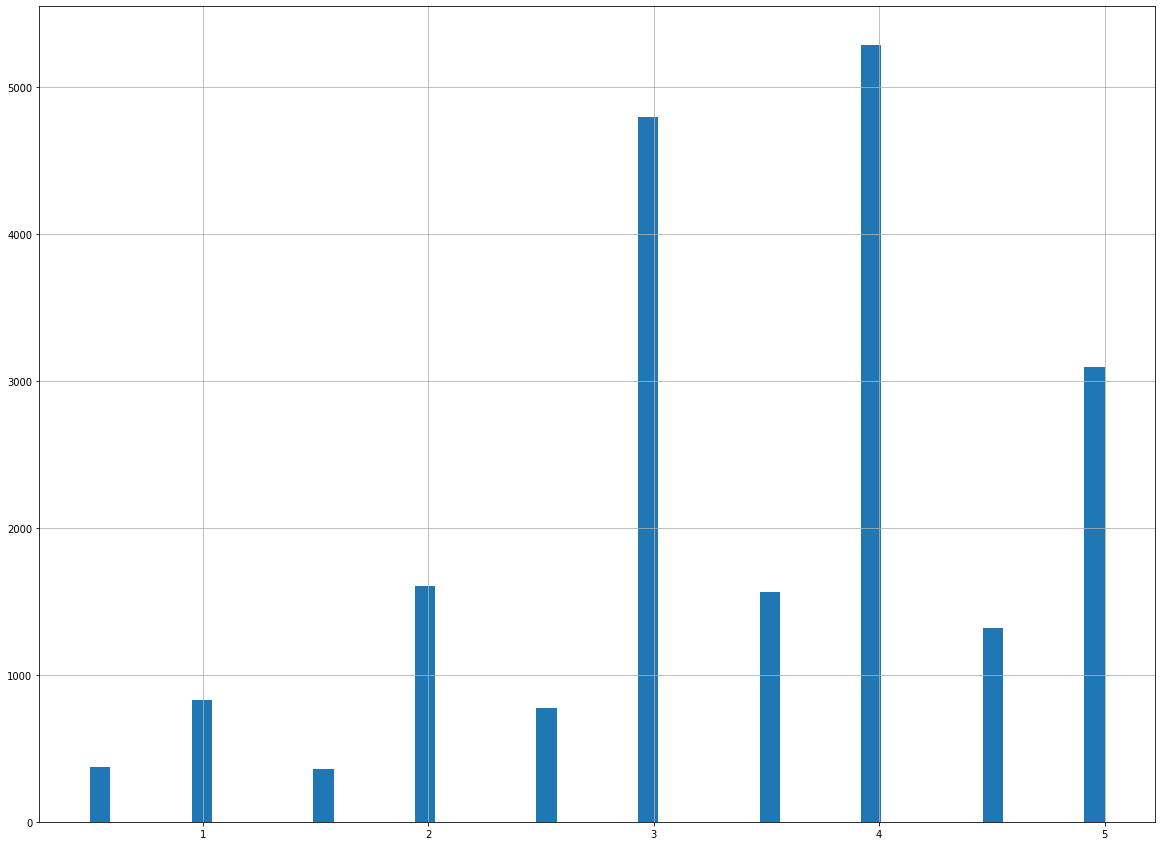

In [5]:
ratings_df['rating'].hist(bins = 50, figsize=(20, 15))

Also display some basic statistical analysis for the movies dataset

In [7]:
movies_df = pd.read_csv(data_path+"/movies.csv")
movies_df.rename(columns={'movieId': 'item'},
          inplace=True, errors='raise')
movies_df.index =movies_df['item']
movies_df=movies_df[['title', 'genres']]
display(movies_df.head(10))

,title,genres
item,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
6,Heat (1995),Action|Crime|Thriller
7,Sabrina (1995),Comedy|Romance
8,Tom and Huck (1995),Adventure|Children
9,Sudden Death (1995),Action


## Measuring sparsity of datasets

### Visualization of the distribution of the number of evaluations for each movie.
This is pretty muc the code from the lab

,user
item,
1,57
2,21
3,18
4,3
5,11
...,...
116797,1
117511,1
117590,1


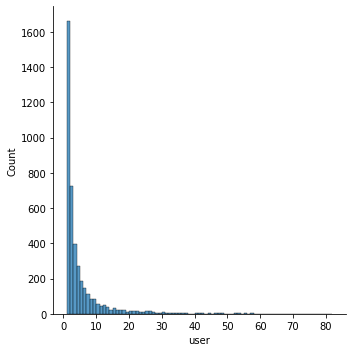

In [7]:

count_ratings_df = ratings_df[['user','item']].groupby(['item']).count()
display(count_ratings_df)
sns.displot(data=count_ratings_df, x='user', binwidth=1)

We want to visuaize instead on the horizontal axe the movies, and on the vertical axe the number of users who evaluated it.

,index,item,user
0,0,296,82
1,1,356,80
2,2,480,73
3,3,318,70
4,4,593,68
...,...,...,...
4187,4187,5958,1
4188,4188,2070,1
4189,4189,2072,1
4190,4190,2084,1


<AxesSubplot:xlabel='index', ylabel='user'>

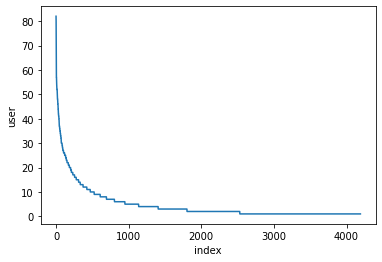

In [8]:
count_ratings_df_ord = count_ratings_df.sort_values(by="user", ascending=False).reset_index().reset_index()
display(count_ratings_df_ord)
sns.lineplot(data=count_ratings_df_ord, x='index', y='user')

# Algorithms:

To make sure our algorithms compile, we need to test the recommendations on a user. To do such thing we select a random user.
For simplicity, we select a random user from the ratings_df Dataframe having more than 100 evaluations.

In [9]:
users_ratings = ratings_df.groupby(['user']).count()

selected = users_ratings['rating'] > 200
selected_users = users_ratings.loc[selected]
random_selected = selected_users.sample()
select_column_df = random_selected.reset_index()['user']
selected_user = select_column_df.iloc[0]

# Collaborative Algorithms

### Collaborative user-user recommender with Lenskit

We use the collaborative user algorithm UserUser, that uses the nearest neighbors algorithm. The constructor takes as inputs the maximum and minumum number of neighbors to consider (we set them to 15 and 3). Then we use the adapt method of the Recommender class, to obtain a Recommender object. Then, we can use the fit method to train the model.

In [10]:
# We use the collaborative user algorithm UserUser, that use the nearest neighbors 
num_recs = 10  # Number of recommendations to generate
user_user = UserUser(15, min_nbrs=3)  # Minimum (3) and maximum (15) number of neighbors to consider
recsys = Recommender.adapt(user_user)
recsys.fit(ratings_df)

Now, we can provide the recommendations for a specific user. Let's generate 10 recommendations for the user selected for the previous example. We use the recommend method of the Recommender class to generate the recommendations. Then, we add the title information and display the recommendations.

In [ ]:
selected_movies_useruser = recsys.recommend(selected_user, 10) # generate 10 recommendations for the selected user 
selected_movies_useruser = selected_movies_useruser.join(movies_df['title'], on='item')
display(selected_movies_useruser)

In [ ]:
#We use the collaborative user algorithm ItemItem, that use the nearest neighbors 
num_recs = 10  # Number of recommendations to generate
item_item = ItemItem(15, min_nbrs=3)  # Minimum (3) and maximum (15) number of neighbors to consider
recsys_itemitem = Recommender.adapt(item_item)
recsys_itemitem.fit(ratings_df)

selected_movies_itemitem = recsys_itemitem.recommend(selected_user, 10) # generate 10 recommendations for the selected user 
selected_movies_itemitem = selected_movies_itemitem.join(movies_df['title'], on='item')
display(selected_movies_itemitem)


## Aggregation algorithm for group of users

Now, we need to select the user evaluations, that we will use to train our recommender. We print the number of ratings that we have for the considered user, and the extracted dataset, ordered by ratings.

In [ ]:
rated_movies_df = movies_df.loc[list(selected_user_ratings['item'])]
rated_movies_df = rated_movies_df[['title', 'plot']]
print("Rated movies: " + str(rated_movies_df.shape[0]))
display(rated_movies_df.head(10))

We use a similar approach to select the unrated movies. We compute the set of movies index that are not rated using the set subtraction operator. We access the index of the movies_df and the rated_movies_df Dataframes, create two sets containing such indexes, compute the difference set diff, and select the movies having an index in the diff set.

In [ ]:
diff = set(movies_df.index) - set(rated_movies_df.index)
unrated_movies_df = movies_df.loc[diff]
unrated_movies_df = unrated_movies_df[['title', 'plot']]
print("Unrated movies: " + str(unrated_movies_df.shape[0]))
display(unrated_movies_df.head(10))

Finally, we can add the rating so that we just need to work with a single Dataframe. We do it using the join method. We specify the item as idex in the selected_user_ratings Dataframe to procede with the join. The we select the rating column.

In [ ]:
rated_movies_df = rated_movies_df.join(selected_user_ratings.set_index('item')['rating'], on='item')
print("Rated movies: " + str(rated_movies_df.shape[0]))
display(rated_movies_df.head(10))

### Using words frequencies in plots like in the lab
Possible improvements: lemmatization, removal of stopwords, etc, take a look at the library nltk

Compute a feature representation for the movie's contents (TF-IDF)

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(rated_movies_df['plot'])
print(X.shape)

Train a regressor, computing of the predicted ratings for unrated movies, and recommending the movies with higher predicted ratings

In [ ]:
X_unrated = vectorizer.transform(unrated_movies_df['plot'])
print(X_unrated.shape)
y_unrated = neigh.predict(X_unrated)
print(y_unrated.shape)

### Use tags in the tag dataset (this was not in the lab)

In [35]:
tags_df = pd.read_csv(data_path+"/tags.csv", nrows=20000)
tags_df.rename(columns={'userId': 'user',
                   'movieId': 'item'},
          inplace=True, errors='raise')

In [14]:
tags_df.head()

,user,item,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


Let´s see how many tags are in our dataset

In [47]:
print(len(tags_df['tag'].unique()))

5822


Ok, so we know some tags have been assigned to more than one movie, let´s compute the sparsity of the tag feature

In [ ]:
tags_df['item']= tags_df.index
count_tags_df = tags_df[['tag','movie']].groupby(['tag']).count()
count_tags_df = count_tags_df.sort_values(by="movie", ascending=False).reset_index()
#print(list(count_tags_df.index))
display(count_tags_df)
sns.displot(data=count_tags_df, x=list(count_tags_df.index), y='item')

It seems that there is exactly one tag per movie. Let´s see if it is true

We inspect how many tags are assigned to each movie

In [ ]:
tags_df['item']= tags_df.index
count_tags_items_df = tags_df[['tag','item']].groupby(['tag']).count()
#display(count_tags_df)
count_tags_items_df = count_tags_items_df.sort_values(by="movie", ascending=False).reset_index()
#print(list(count_tags_df.index))
display(count_tags_items_df)
sns.displot(data=count_tags_df, x=list(count_tags_items_df.index), y='item')

In [ ]:
Indeed there is exactly one tag , now let´s see how 